# LSMLSDA Programming Exercise Week 1
## Modelling decision making with a drift-diffusion model

This exercise was kindly provided by Prof. Sprekeler, Modelling of Cognitive Processes Group, BCCN Berlin. 


We will explore the reaction time distribution of the drift diffusion model
for perceptual decision making. 

Important paper: https://www.ncbi.nlm.nih.gov/pubmed/17600525

General information: https://en.wikipedia.org/wiki/Two-alternative_forced_choice

In [13]:
# imports 
import numpy as np
import matplotlib.pyplot as plt 

np.random.seed(1809)
%matplotlib inline

### Part 1
Our goal is to simulate a decision making process. A very much simplified approach to that is to simulate a biased random walk: We simulate an internal decision variable, e.g., some neural activity, using a single scalar variable. At every time step, the variable evolves in a certain direction due to sensory evidence for a decision in that direction (drift, $\mu$), plus noise (diffusion, $\sigma$). Such a model is often called a drift-diffusion model. A simple form of the drift diffusion model is given by

$$
dX = \mu \mathrm{dt} + \sigma \mathrm{dW} ,
$$

To simulate the decision making process as a drift-diffusion process we have to integrate this equation. Because it is a stochastic differential equation (sde) we cant use standard implementation like scipy odeint for integration. Therefore, your first task is to implement your own Euler-Marayuma sde solver.

Euler-Maruyama is an extension of the simple Euler method to stochastic differential equations where we here only consider Gaussian noise processes. Euler-Maruyama
integrates differential equations of the form

\begin{align}
dX(t) &= f(X(t))\mathrm{dt} + g(X(t))\mathrm{dW}(t)
\end{align}

here f (X(t)) is the deterministic part of the differential equation and g(X(t))dW (t) is
the stochastic part where dW (t) is a random variable. Euler-Maruyama consists of the
following update which your function has to implement:

\begin{align}
X_t = X_{t-1} + f(X_{t-1}) \Delta t + g(X_{t-1}) \sqrt{\Delta t} W_t
\end{align}

Each $W_t$ is a sample from a standard normal distribution. For more information about
Euler-Maruyama see Higham (2001), or Wikipedia.
Write a function euler_maruyama(ffun, gfun, x0, t, \**args) which implements this equation
and which behaves like scipy odeint. Note that we have defined args as a dictionary which differs
from scipy odeint where args is a tuple. This makes it easier to change individual parameters of
the model functions later.

Start with $X = 0$. Choose
$\sigma = 0.5, \mu = 0.2$. Run 5 simulations of 10 seconds length with $dt = 0.01s$ and
plot the results.

**Hint**: A single simulation is a trace of values starting at X=0 and evolving as a random walk with a drift towards more positive (or negative) values. Plot all 5 traces in a single plot with different colors. 

In [51]:
def ffun(x, **args):
    return mu
def gfun(x, **args):
    return sigma

def euler_maruyama(ffun, gfun, x0, t, **args):
    """Implementation of Euler-Maruyama method. 
    
    :param ffun: function to compute the deterministic part; here mu
    :param gfun: function to compute the stochastic part; here sigma 
    :param x0: starting value for t=0
    :param t: time steps 
    :param **args: distribution parameters with delta_t, mu, sigma ... 
    """
    
    dt = t[1]
    
    x = np.zeros(t.shape[0])
    
    for i,_ in enumerate(x):
        x[i] = x[i-1] + ffun(x[i-1], **args) * dt + gfun(x[i-1], **args) * np.sqrt(dt) * np.random.randn()
    
    return x


In [40]:
ffun

<function __main__.ffun(x, **args)>

In [52]:
# parameters 
drift = 0.2
noise = 0.5
dt = 0.01
t = np.linspace(0,10, int(10/0.01))
mu = 0.2
sigma = 0.5

# For Loop, um 5 Mal zu simulieren
# Erstellen einer MAtrix, in der ich meine Lösung speichere
n_runs = 5
solutions = np.zeros((len(t), n_runs))

for run_index in range(n_runs):
    solutions[:,run_index] = euler_maruyama(ffun, gfun, 0, t, **dict(mu=mu, sigma=sigma))

#sim_2 = euler_maruyama(drift, noise, 0, t, delta_t=dt, mu=0, sigma=1)
#sim_3 = euler_maruyama(drift, noise, 0, t, delta_t=dt, mu=0, sigma=1)
#sim_4 = euler_maruyama(drift, noise, 0, t, delta_t=dt, mu=0, sigma=1)
#sim_5 = euler_maruyama(drift, noise, 0, t, delta_t=dt, mu=0, sigma=1)

In [53]:
solutions

array([[ 6.25261938e-02,  4.10306409e-02, -5.61188962e-03,
        -1.10849345e-02,  2.71164550e-02],
       [ 2.94297821e-02,  6.17384725e-02, -7.84834692e-02,
        -5.19717520e-02,  1.47871982e-02],
       [-3.96257276e-03,  8.27313275e-02, -3.42090492e-02,
        -1.50303418e-01, -1.55935020e-02],
       ...,
       [-4.69342197e-01,  5.50915535e+00,  1.36213121e+00,
         1.36729393e+00, -1.12765025e+00],
       [-5.02315204e-01,  5.44840897e+00,  1.41118112e+00,
         1.41878231e+00, -1.09369735e+00],
       [-5.78733921e-01,  5.42017319e+00,  1.35099331e+00,
         1.38563784e+00, -1.08350990e+00]])

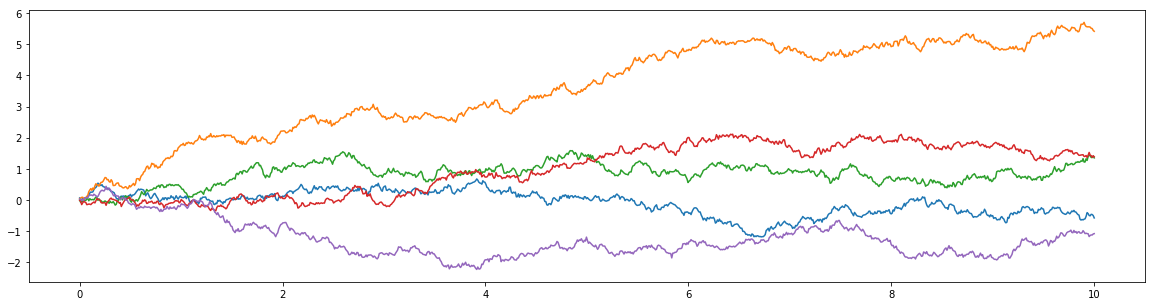

In [54]:
plt.figure(figsize=(20,5))
plt.plot(t,solutions)

In [20]:
time_steps = np.arange(0, t, dt)

plt.figure(figsize=(15,12), dpi=80)

plt.plot(time_steps, sim_1, 'b-', label='simulation 01')
plt.plot(time_steps, sim_2, 'r-', label='simulation 02')
plt.plot(time_steps, sim_3, 'g-', label='simulation 03')
plt.plot(time_steps, sim_4, 'y-', label='simulation 04')
plt.plot(time_steps, sim_5, 'c-', label='simulation 05')

plt.title('5 simulations with 10 seconds each')
plt.xlabel('seconds (s)')
plt.ylabel('extent')
plt.legend()
plt.grid()
plt.show()

/Users/lisasogerer/anaconda3/envs/lsmlsda/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """Entry point for launching an IPython kernel.


TypeError: only size-1 arrays can be converted to Python scalars

### Part 2

Plot the percentage of ”up” (X=+a) responses as a function of the drift μ by
simulating 200 trials for a = 1 and the following $\mu$ values: −0.1, 0, 0.1, 0.2, 0.5.

Resimulate trials in which no decision boundary is reached during the simulation.

Plot the results. What happens to this curve if you double, what if you halve the
value of a?


In [6]:
drift_values = np.array([-0.1, 0, 0.1, 0.2, 0.5])
drift_a = 1
n_trials = 200

In [7]:
# ??? ANNAHME, DASS a DEM THRESHOLD ENTSPRICHT ???
# -> sobald der ERSTE wert der folge >=1 ist, wird "up" angenommen
# -> 200 trials je drift ??? und dt bleibt gleich ???
# --> innerhalb v. 200 runden je drift muss ein mal >=1 vorkommen ???
# --> up ist dann quasi immer der fall
# skipped: resimulate 
def run_simulations(drifts, trials_per_drift):
    """Simulating with given drifts for a given number trials per drift. 
    
    :param drifts: list or array 
    :param trials_per_drift: int
    :return: dict(drfit, results)
    """
    simulations = {}
    for drift in drifts:
        acc = []    
        for _ in range(trials_per_drift):
            sim = euler_maruyama(drift, noise, 0, t, delta_t=dt, mu=0, sigma=1)
            acc.append(1 if np.sum(sim.astype(int)) >= 1 else 0)
        simulations[drift] = acc
    
    return simulations
    
def cal_up_percentage(simulations):
    """Calculating the percentage of positive results. """
    up_percentage = {}
    for k,v in simulations.items():
        up_percentage[k] = np.sum(v)/len(v)
    
    return up_percentage

{-0.1: 1.0, 0.0: 0.0, 0.2: 0.0, 0.1: 0.0, 0.5: 1.0}


TypeError: 'float' object is not iterable

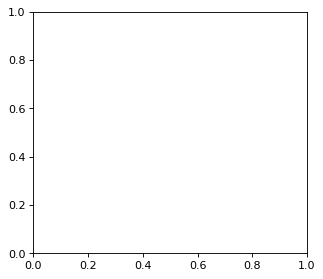

In [17]:
plt.figure(figsize=(15,4), dpi=80)
for i,a in enumerate([1, 2, 0.5]):
    plt.subplot(1,3,i+1)
    sim = cal_up_percentage(run_simulations(drift_values, 1))
    print(sim)
    plt.bar(sim.keys(), sim.values(), width=0.005, label='for a={}'.format(a))

plt.title('200 trials per drift value with different thresholds')
plt.legend()
plt.show()

### Part 3

Use the results from the last exercise to pick a value of $\mu$ (with $\sigma = 0.5$) for which
about $70\%$ of the trials result in an ”up” response. Run 2000 trials and record the
reaction times, i.e. the moment when the decision variable X crosses one of the
two decision thresholds at X = ±a (for a = 1), as well as the choice, i.e. which of
the boundaries was hit.

In [ ]:
# your code

In [ ]:
# ...

### Part 4

Plot a histogram of the reaction times for each of the choices separately, and
compare the distributions. Calculate their individual mean reaction times and
discuss whether (and why) this is what you would have expected.

Can you reproduce qualitatively figure 5b of Gold and Shadlen (2007): increase motion strength (loosely speaking increased drift $\mu$) results in higher percentage correct and reduced mean reaction times?  

In [ ]:
# your code 

In [ ]:
# ...

### Part 5

Implement an extended version of the drift-diffusion model, in which the drift $\mu$
for each trial is drawn from a Gaussian distribution with mean $m_{\mu}$ and standard
deviation $s_{\mu}$ . Find values for $m_{\mu}$ and $s_{\mu}$ that keep $70\%$ ”up” rate but have reaction
time distributions that (qualitatively) fit experimental results better. Plot your
resulting distributions and mean reaction times for ”up” and ”down” responses
from 2000 trials.